In [1]:
import numpy as np 

np.random.seed(42)
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'y')

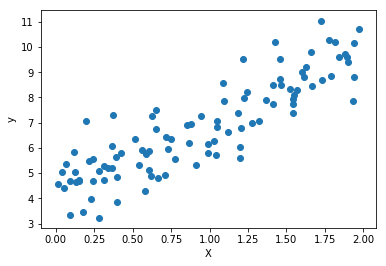

In [3]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [4]:
X_b = np.c_[np.ones((100,1)), X] #add x0=1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best #theta0 and theta1

array([[4.21509616],
       [2.77011339]])

In [6]:
#make prediction using thetas

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [7]:
y_new = 4+3*X_new+np.random.randn(2,1)
y_new

array([[ 4.01300189],
       [11.45353408]])

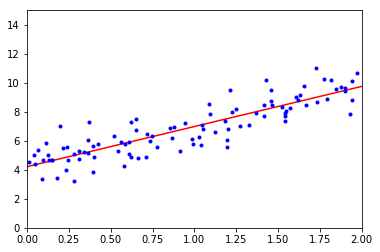

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
#using scipy least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd#, residuals, rank, s

array([[4.21509616],
       [2.77011339]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [13]:
#Batch gradient descent
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization 
c = 0
for i in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    c +=1
c
#goes through the entire training set 1000 times

1000

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

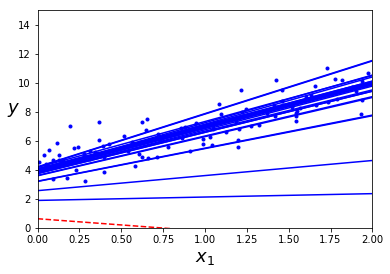

In [15]:
#Stochastic Gradient Descent 
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 25:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                              
plt.show()        

In [16]:
theta #pretty good

array([[4.18228368],
       [2.72737073]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, epsilon=None)
sgd_reg.fit(X_b,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=None,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [18]:
sgd_reg.coef_

array([2.1615993 , 2.81938362])

In [19]:
#Poly Nomial Regression

In [20]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)

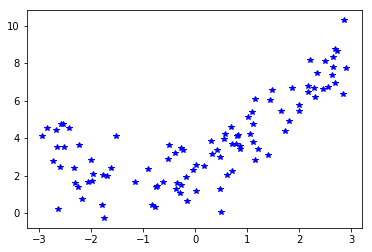

In [21]:
plt.plot(X,y,"b*")

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[1], X_poly[1]

(array([1.05675239]), array([1.05675239, 1.1167256 ]))

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.36998971]), array([[0.92612411, 0.44649507]]))

In [24]:
y_predict = lin_reg.predict(X_poly)

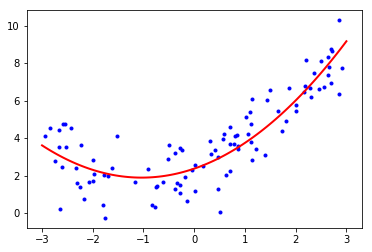

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

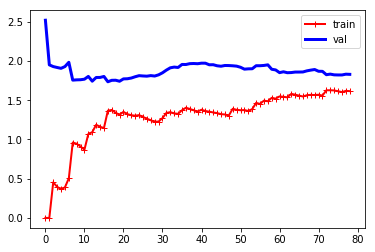

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()
plt.show()

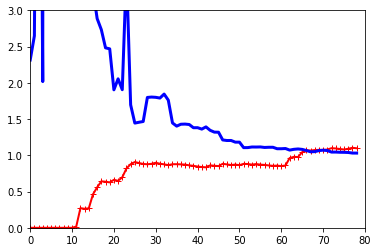

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression()),
                                 ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                       

In [29]:
#### Ridge regression using matrix factorization technique by Andre-Louis 
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
y_t = 1 + 0.5*1.5+ np.random.randn(1, 1) / 1.5
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]]), y_t

(array([[1.55071465]]), array([[1.8892424]]))

In [30]:
#### Ridge using Stochastic Gradient Descent

sgd_reg = SGDRegressor(max_iter=100, penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]]), y_t

(array([1.51789155]), array([[1.8892424]]))

In [31]:
#Lasso using normal equation
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]]), y_t

(array([1.53788174]), array([[1.8892424]]))

In [32]:
#Lasso using GD 
sgd_reg = SGDRegressor(max_iter=100, penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]]), y_t

(array([1.51722254]), array([[1.8892424]]))

In [33]:
#Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1_ratio is the mix ratio r, alpha is the shrinkage magnitude
elastic_net.fit(X,y)
elastic_net.predict([[1.5]]), y_t

(array([1.54333232]), array([[1.8892424]]))

In [34]:
#Basic Implementation of Early Stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

#prepare data
poly_scaler = Pipeline([('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler()),
                       ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(10000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)        

In [35]:
best_model, best_epoch

(SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
        verbose=0, warm_start=True), 284)

In [46]:
-np.log(0.1) #goes large when value approaches zero. So cost will be higher if probability is close to 0 for a
#postive instance 

2.3025850929940455

In [47]:
-np.log(1- 0.1) #and cost will be large if predicted probability is close to 1 for a negative instance 

0.10536051565782628

In [50]:
#Logistic Regression on IRIS datset
from sklearn.datasets import load_iris

iris = load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [52]:
X = iris["data"][:,3:] #petal width
y = (iris["target"]==2).astype(np.int) # 1 if iris-virginica else 0

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() #l2 penalty by default 
log_reg.fit(X,y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

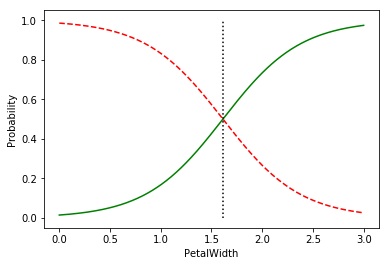

In [85]:
#petal widths varying from 0-3
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virgin")
plt.plot(X_new, y_proba[:,0], "r--", label="Iris-Not-Virgin")
plt.plot([decision_boundary,decision_boundary], [0,1], "k:")
plt.xlabel('PetalWidth')
plt.ylabel('Probability')
plt.show()

In [86]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [94]:
-np.log2(0.25)

2.0

In [96]:
-np.log2(0.75)

0.4150374992788438

In [99]:
X = iris["data"][:,(2,3)] #petal length, width
y = iris['target']

In [100]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
softmax_reg.predict([[5,2]])

array([2])

In [103]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Batch Gradient Descent with Early Stopping for Softmax Regression

In [105]:
X = iris["data"][:, (2,3)]
y = iris["target"]

In [107]:
#add bias term for every instance. bias=1
X_bias = np.c_[np.ones([len(X),1]), X]
X_bias

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.1, 0.1],
       [1. , 1.2, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.3, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.7, 0.3],
       [1. , 1.5, 0.3],
       [1. , 1.7, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1. , 0.2],
       [1. , 1.7, 0.5],
       [1. , 1.9, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.4],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.5, 0.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.2, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.3, 0.3],
       [1. , 1.3

In [175]:
np.random.seed(2042)

In [176]:
#set dataset sizes
test_ratio = 0.2
validation_ratio = 0.2 
total_size = len(X_bias)

In [177]:
test_size = int(total_size*test_ratio)
validation_size = int(total_size*validation_ratio)
train_size = total_size - test_size - validation_size

In [178]:
rnd_indices = np.random.permutation(total_size)
rnd_indices
X_train = X_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [179]:
rnd_indices[: train_size]

array([ 33,  99, 147,  53,  88,  22,  65,  52,  50,  49,  91, 103,  12,
        68,  82, 108,  76,  61,  45, 107,  85,  58,  80, 137,  16,  43,
        34, 117,   6,  74, 118,  17, 128,  66,  59, 122,  78,  44,  25,
        51, 125, 124, 136, 134,   5, 110,  40, 100, 114, 133, 126,  36,
         2,  92,  96, 105,   1,  27,  63,   9, 121,  41,  60,  89, 112,
       120, 132,  10,  18,  29, 142,  84, 143,  77,  31,  73,  14,  56,
       106, 115,  69,  23, 109, 123,  37, 113,   3,  42,  28,  24])

In [180]:
def to_one_hot(y):
    n_classes = y.max()+1
    m = len(y)
    Y_one_hot = np.zeros((m,n_classes))
    Y_one_hot[np.arange(m),y] = 1
    return Y_one_hot

In [181]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [182]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [183]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [184]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps,axis=1,keepdims=True)
    return exps/exp_sums

In [185]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

log cant be computed if predicted probability is 0 so add a small value

In [186]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon),axis=1))
    error = Y_proba - Y_train_one_hot
    if i%500==0:
        print(i, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta*gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981873
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.4482424418895776
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390373


In [187]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [188]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict==y_valid)
accuracy_score

0.9666666666666667

In [189]:
#With L2 Regularization
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 #regularization parameter 

theta = np.random.randn(n_inputs, n_outputs)

for i in range(n_iterations):
    logits = X_train.dot(theta)
    Y_proba = softmax(logits)
    x_entropy_loss = -np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon),axis=1))
    l2_loss = 1/2*np.sum(np.square(theta[1:]))
    loss = x_entropy_loss + alpha*l2_loss
    error = Y_proba - Y_train_one_hot
    if i%500==0:
        print(i, loss)
    gradients = 1/m *X_train.T.dot(error) + np.r_[np.zeros([1,n_outputs]), alpha*theta[1:]]
    theta = theta - eta*gradients


0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.48929905984511984
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [190]:
logits = X_valid.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [211]:
#with early stopping
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
        theta = Theta
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.04775091268417
500 0.5721331613175611
1000 0.5431219306010312
1500 0.5354510851879438
2000 0.5331618209258674
2500 0.5325888092626213
2751 0.532545954854535
2752 0.5325459557705009 early stopping!


In [212]:
Theta , theta

(array([[ 3.87606991, -0.02501511, -4.8817764 ],
        [-1.0664671 ,  0.14851335,  0.91795376],
        [-0.42981075, -0.13174246,  0.56155321]]),
 array([[ 3.875913  , -0.02514197, -4.88149262],
        [-1.06643685,  0.14853545,  0.9179014 ],
        [-0.42980359, -0.13173805,  0.56154164]]))

In [213]:
logits = X_valid.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [214]:
logits = X_test.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333